## Table of Content
### Part 0 Environment Preparation

### Part 1 Data Quality Check
  * 1.Zillow Dataset
     * 1.1 Read and Inspect Data
     * 1.2 Check Data Types
     * 1.3 Check duplicated rows and columns
     * 1.4 Check Data Values
     * 1.5 Select Observations with zipcode in NYC
     * 1.6 Check Missing Values
     * 1.7 Check Outliers
     * 1.8 Select Columns
  * 2.Airbnb Dataset
     * 2.1 Read and Inspect Data
     * 2.2 Select Relevant Columns
     * 2.3 Check Data Types
     * 2.4 Fix Data Types
     * 2.5 Check duplicated rows and columns
     * 2.6 Check Data Values
     * 2.7 Select Observations with Special Condition
     * 2.8 Check Missing Values
     * 2.9 Check Outliers
     * 2.10 Aggregate Data by zipcode
  * 3.Merge Zillow and AirBnB dataset
  * 4.Dataset Visualization
     * 4.1 Visualization of Airbnb Dataset
     * 4.2 Visualization of Zillow Dataset
     * 4.3 Visualization of Merging Dataset

### Part 2 Modeling
  * 1.Rent-to-Price Ratio
  * 2.Property Price Analysis
  * 3.Rent Price Analysis

# Part 0  Environment Preparation

In [6]:
## Import python packages
import pandas as pd
import numpy as np

## Import visualization packages
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 

## Import User Defined Package
import lib

## Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
## Change Display Configuration
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Get NYC Zipcode

We get the zipcode list from USPS.com. The scrapping code is in another file for reference.

In [8]:
## get ziplist
NYCZipcode = pd.read_csv('NYCZipcode.csv')
zipList = list(NYCZipcode['0'])  

# Part 1 Data Quality Check

## 1. Zillow Dataset

### 1.1 Read and Inspect Data

In [9]:
## Read Zillow data
zillow = pd.read_csv("Zip_Zhvi_2bedroom.csv")

In [10]:
## Show Head Records
zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798600.0,798800.0,801500.0,804600.0,814900.0,828300.0,835700.0,849300.0,858100.0,854000.0,834800.0,821700.0,830300.0,853700.0,868300.0,875200.0,882200.0,892400.0,905000.0,924000.0,934400.0,932100.0,927500.0,923600.0,907900.0,890900.0,883400.0,896100.0,923900.0,952900.0,964600.0,972500.0,973800.0,973400.0,966500.0,966800.0,967100.0,974800.0,976800.0,976100.0,973700.0,974500.0,973200.0,966400.0,950400.0,933300.0,920900.0,909400.0,891400.0,873300.0,858800.0,850200.0,842800.0,834000.0,828800.0,821400.0,813900.0,813300.0,821500.0,831700.0,845100.0,854500.0,858900.0,859200.0,863500.0,876000.0,886100.0,890000.0,894200.0,901800.0,909500.0,913300.0,907400.0,900000.0,897700.0,896300.0,892300.0,890400.0,888600.0,891700.0,899500.0,904400.0,908200.0,914000.0,915100.0,912300.0,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,167200.0,166900.0,166900.0,168000.0,170100.0,171700.0,173000.0,17460

In [11]:
## Show Tail Records
zillow.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
8941,93454,80532,Drake,CO,Fort Collins,Larimer,8942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212400.0,208800.0,206500.0,204800.0,203000.0,200300.0,200800.0,201500.0,201100.0,203400.0,210300.0,215300.0,215900,216500,218200,218900,222200,226100,226900,224700,225200,222700,217500,213400,214500,214300,211200,208100,212000,216400,213800,208900,207700,207700,210500,216500,221000,224300,229700,234500,237000,240000,242600.0,245000.0,248200.0,253100.0,259500,265600,268300,270800,272200,274700,281300.0,286200,285300,284100,284800,285800,287500
8942,62556,12429,Port Ewen,NY,Kingston,Ulster,8943,64500.0,64000.0,63400.0,63100.0,63100.0,63000.0,62700.0,63000.0,64000.0,64900.0,65400.0,66000.0,66000.0,66100.0,66900.0,67800.0,68100.0,68400.0,68700.0,68500.0,67600.0,67000.0,66600.0,66600.0,67300.0,68700.0,69500.0,68800.0,67800.0,67400.0,67500.0,68100.0,68600.0,68300.0,67900.0,67900.0,67500.0,66600.0,65900.0,65800.0,66300.0,66800.0,67500.0,67900.0,68300.0,68700.0,69800.0,70900.0,72000.0,73300.0,75400.0,77300.0,78600.0,79500.0,79800.0,80600.0,82000.0,83300.0,83900.0,84300.0,84300.0,84900.0,85600.0,85800.0,86000.0,86700.0,88100.0,90600.0,92900.0,94600.0,95800.0,

In [12]:
## Check Data Shape
print(zillow.shape)
print(f'zillow dataset has {zillow.shape[0]} observations and {zillow.shape[1]} columns.')

(8946, 262)
zillow dataset has 8946 observations and 262 columns.


### 1.2 Check Data Types

#### 1.2.1 Check Data Types

In [13]:
## Check data type of each variable
pd.DataFrame(zillow.dtypes).transpose()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,int64,int64,object,object,object,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,fl

The data types correctly reflect each variable. For the price columns in different time range(1996-04,...,2017-06), the data type is float or int, but it's reasonable for the price and there is no need to transform them into the same type.

#### 1.2.2 Categorize Variables

In [14]:
## Get Categorical Variables
zillow_categorical = [var for var in zillow.columns if zillow[var].dtype=='O']
print(f'Categorical Variables: {len(zillow_categorical)}')

## Get Numerical Variables
zillow_numerical = [var for var in zillow.columns if zillow[var].dtype!='O']
print(f'Numerical Variables: {len(zillow_numerical)}')

## Get Discrete Variables
zillow_discrete = ['RegionID','RegionName','SizeRank']
print(f'Discrete Variables: {len(zillow_discrete)}')

## Get Continuous Variables
zillow_continuous = [var for var in zillow_numerical if var not in zillow_discrete]
print(f'Continuous Variables: {len(zillow_continuous)}')

Categorical Variables: 4
Numerical Variables: 258
Discrete Variables: 3
Continuous Variables: 255


### 1.3 Check duplicated rows and columns

In [15]:
## Check number of duplicated rows
zillow.duplicated().sum()

0

In [16]:
## Check number of duplicated columns
zillow_t = zillow.T
zillow_t.duplicated().sum()

0

No duplicated rows and columns. The data is **unique**.

### 1.4 Check Data Values

#### 1.4.1 Check Values of Categorical and Discrete Variables

In [17]:
zillow_discrete + zillow_categorical

['RegionID', 'RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName']

There is no need to check 'RegionID', because it's only an indentifier for the region, so it won't give us much useful information for the next analysis. I will only choose 'RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName' for the quality check.

In [18]:
# Unique Values for each variable
print(f'Unique RegionName Values:{len(zillow.RegionName.unique())}')
print(f'Unique SizeRank Values:{len(zillow.SizeRank.unique())}')
print(f'Unique City Values:{len(zillow.City.unique())}')
print(f'Unique State Values:{len(zillow.State.unique())}')
print(f'Unique Metro Values:{len(zillow.Metro.unique())}')
print(f'Unique CountyName Values:{len(zillow.CountyName.unique())}')

Unique RegionName Values:8946
Unique SizeRank Values:8946
Unique City Values:4684
Unique State Values:48
Unique Metro Values:467
Unique CountyName Values:722


Number of unique RegionName and SizeRank values are the same with number of observations of the dataset, so for each observation, they will have an unique zipcode and population size.

City, Metro and CountyName hace too many unique values. Let's check State values first.

In [19]:
## Check State Values
zillow.State.unique()

array(['NY', 'IL', 'TX', 'CA', 'FL', 'TN', 'NC', 'GA', 'DC', 'MD', 'MO',
       'VA', 'NJ', 'OK', 'OH', 'AZ', 'KS', 'NM', 'WA', 'CT', 'NV', 'MA',
       'PA', 'MI', 'CO', 'KY', 'OR', 'SC', 'IN', 'ND', 'AR', 'AL', 'MN',
       'DE', 'MS', 'ID', 'MT', 'WI', 'HI', 'UT', 'LA', 'RI', 'IA', 'NE',
       'WY', 'AK', 'NH', 'WV'], dtype=object)

There are 48 states. The values of the State names seem clean and right. Since we only care about the zipcode in NYC, which is in NY state, so I will only check the values of other categorical variables in NY state for convenience.

In [20]:
## Metro values in NY state
zillow[zillow.State=="NY"].Metro.unique()

array(['New York', 'Ithaca', 'Rochester', 'Buffalo', 'Albany',
       'Binghamton', 'Watertown', 'Auburn', 'Kingston', 'Plattsburgh',
       'Syracuse', 'Amsterdam', 'Glens Falls', 'Cortland', 'Gloversville',
       'Batavia', 'Corning', 'Elmira', 'Olean', nan, 'Seneca Falls'], dtype=object)

In [21]:
## City Name in NY state
np.sort(zillow[zillow.State=="NY"].City.unique())

array(['Albany', 'Ashford', 'Auburn', 'Aurelius', 'Ballston', 'Barker',
       'Beacon', 'Beekman', 'Berne', 'Bethlehem', 'Binghamton',
       'Black Brook', 'Bolton', 'Brighton', 'Bronxville', 'Brutus',
       'Calverton', 'Cambria', 'Campbell', 'Carlton', 'Carmel', 'Caroline',
       'Carthage', 'Catlin', 'Central Square', 'Chappaqua', 'Chazy',
       'Chenango', 'Chester', 'Chili', 'Cicero', 'Clarendon', 'Clarkstown',
       'Clay', 'Clifton Park', 'Cohoes', 'Colesville', 'Commack',
       'Conesus', 'Conklin', 'Conquest', 'Coram', 'Cornwall',
       'Cornwall on Hudson', 'Cortland', 'Cortlandt Manor', 'Covert',
       'Dansville', 'Day', 'De Witt', 'Deerpark', 'Dobbs Ferry', 'Dover',
       'East Fishkill', 'East Hampton', 'East Quogue', 'East Rochester',
       'Edinburg', 'Elmont', 'Fairmount', 'Fenton', 'Florida', 'Freeport',
       'Fulton', 'Gang Mills', 'Gardiner', 'Glens Falls', 'Glenville',
       'Gloversville', 'Gowanda', 'Great Valley', 'Greenburgh',
       'Greenfield C

In [22]:
## County Name in NY state
print(f'Unique County Name Values in NY:{len(zillow[zillow.State=="NY"].CountyName.unique())}')
print(zillow[zillow.State=="NY"].CountyName.unique())

## County Name in New York City
print(f'Unique County Name Values in NYC, NY:{len(zillow[(zillow.State=="NY")&(zillow.City=="New York")].CountyName.unique())}')
print(zillow[(zillow.State=="NY")&(zillow.City=="New York")].CountyName.unique())

Unique County Name Values in NY:38
['New York' 'Kings' 'Richmond' 'Tompkins' 'Westchester' 'Monroe' 'Niagara'
 'Suffolk' 'Orange' 'Queens' 'Saratoga' 'Broome' 'Jefferson' 'Cayuga'
 'Nassau' 'Dutchess' 'Rockland' 'Ulster' 'Clinton' 'Oswego' 'Onondaga'
 'Albany' 'Schenectady' 'Montgomery' 'Warren' 'Cortland' 'Fulton' 'Putnam'
 'Genesee' 'Steuben' 'Chemung' 'Cattaraugus' 'Chenango' 'Washington'
 'Tioga' 'Orleans' 'Seneca' 'Livingston']
Unique County Name Values in NYC, NY:4
['New York' 'Kings' 'Richmond' 'Queens']


In [23]:
## Check RegionName in NY
print(f'Unique RegionName Values:{len(zillow[zillow.State=="NY"].RegionName.unique())}')

## Check RegionName in New York City
print(f'Unique RegionName Values:{len(zillow[(zillow.State=="NY")&(zillow.City=="New York")].RegionName.unique())}')
print(zillow[(zillow.State=="NY")&(zillow.City=="New York")].RegionName.unique())

Unique RegionName Values:475
Unique RegionName Values:25
[10025 10023 10128 10011 10003 11201 11234 10314 11215 10028 10021 10014
 10036 11434 10306 10312 10022 11217 10013 11231 10304 10305 10309 10308
 10303]


The values all seem reasonable and correspond to real world situation.

#### 1.4.2 Check Continuous Variables

In [24]:
## all the numeric values
zillow[zillow_continuous].describe()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
count,6284.000000,6364.000000,6364.000000,6369.000000,6370.000000,6370.000000,6370.000000,6380.000000,6380.000000,6404.000000,6833.000000,6853.000000,6853.000000,6853.000000,6855.000000,6855.000000,6952.000000,6955.000000,6955.000000,6958.000000,6962.000000,6979.000000,7124.000000,7125.000000,7081.000000,6973.000000,6985.000000,7170.000000,7204.000000,7204.000000,7216.000000,7237.000000,7239.000000,7240.000000,7257.000000,7258.000000,7258.000000,7261.000000,7271.000000,7271.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7313.000000,7313.000000,7315.000000,7315.000000,7315.000000,7.320000e+03,7.348000e+03,7.348000e+03,7.348000e+03,7.348000e+03,7.348000e+03,7.267000e+03,7.366000e+03,7.393000e+03,7.394000e+03,7.394000e+03,7.395000e+03,7.395000e+03,7.400000e+03,7.400000e+03,7.400000e+03,7.401000e+03,7.401000e+03,7.401000e+03,7.408000e+03,7.408000e+03,7.409000e+03,7.409000e+03,7.409000e+03,7.409000e+03,7.422000e+03,7.424000e+03,7.425000e+03,7.425000e+03,7.425000e+03,7.426000e+03,7.447000e+03,7.448000e+03,7.448000e+03,7.448000e+03,7.448000e+03,7.448000e+03,7.461000e+03,7.462000e+03,7.463000e+03,7.464000e+03,7.466000e+03,7.467000e+03,7.499000e+03,7.518000e+03,7.518000e+03,7.518000e+03,7.520000e+03,7.520000e+03,7.543000e+03,7.548000e+03,7.554000e+03,7.557000e+03,7.557000e+03,7.558000e+03,7.625000e+03,7.641000e+03,7.643000e+03,7.643000e+03,7.643000e+03,7.643000e+03,7.658000e+03,7.658000e+03,7.660000e+03,7.661000e+03,7.661000e+03,7.662000e+03,7.686000e+03,7.686000e+03,7.687000e+03,7.687000e+03,7.687000e+03,7.687000e+03,7.696000e+03,7.697000e+03,7.698000e+03,7.698000e+03,7.698000e+03,7.699000e+03,7.704000e+03,7.706000e+03,7.707000e+03,7.707000e+03,7.708000e+03,7.708000e+03,7.720000e+03,7.720000e+03,7.720000e+03,7.720000e+03,7.720000e+03,7.720000e+03,7.721000e+03,7.721000e+03,7.721000e+03,7.721000e+03,7.721000e+03,7.721000e+03,7.752000e+03,7.752000e+03,7.752000e+03,7.752000e+03,7.752000e+03,7.753000e+03,7.

By checking mean, min and max, the values seem reasonable in terms of the 2 bedroom property price. No extreme or weird values found.

### 1.5 Select  Observations with zipcode in NYC

In order to make sure the zipcode we finally selected are the real zipcode in NYC, I also used the NYC zipcode list provided by USPS to verify our results

In [25]:
## USPS Zipcode selection result:
zillow_zip = zillow[list(map(lambda x:lib.helperInNYC(x,zipList),zillow.RegionName))].RegionName.unique()
print(len(zillow_zip))
zillow_zip

25


array([10025, 10023, 10128, 10011, 10003, 11201, 11234, 10314, 11215,
       10028, 10021, 10014, 10036, 11434, 10306, 10312, 10022, 11217,
       10013, 11231, 10304, 10305, 10309, 10308, 10303], dtype=int64)

It turns out to be the same result as I checked the result of the Unique RegionName in NYC in the last step of 1.4.1

In [26]:
## Selecting zipcode in NYC
zillow_NYC = zillow[list(map(lambda x:lib.helperInNYC(x,zipList),zillow.RegionName))]

In [27]:
zillow_NYC.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798600.0,798800.0,801500.0,804600.0,814900.0,828300.0,835700.0,849300.0,858100.0,854000.0,834800.0,821700.0,830300.0,853700.0,868300.0,875200.0,882200.0,892400.0,905000.0,924000.0,934400.0,932100.0,927500.0,923600.0,907900.0,890900.0,883400.0,896100.0,923900.0,952900.0,964600.0,972500.0,973800.0,973400.0,966500.0,966800.0,967100.0,974800.0,976800.0,976100.0,973700.0,974500.0,973200.0,966400.0,950400.0,933300.0,920900.0,909400.0,891400.0,873300.0,858800.0,850200.0,842800.0,834000.0,828800.0,821400.0,813900.0,813300.0,821500.0,831700.0,845100.0,854500.0,858900.0,859200.0,863500.0,876000.0,886100.0,890000.0,894200.0,901800.0,909500.0,913300.0,907400.0,900000.0,897700.0,896300.0,892300.0,890400.0,888600.0,891700.0,899500.0,904400.0,908200.0,914000.0,915100.0,912300.0,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [28]:
zillow_NYC.shape

(25, 262)

### 1.6 Check Missing Values

#### 1.6.1 Check Missing Values

In [29]:
## Show number of missing values and missing ratios for each column
total = zillow_NYC.isnull().sum()
ratios = zillow_NYC.isnull().mean()
pd.concat([total, ratios], axis=1, keys=['Total', 'Ratios']).transpose()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,16.00,14.00,13.00,13.00,12.00,12.00,12.00,10.0,10.0,10.0,5.0,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.64,0.56,0.52,0.52,0.48,0.48,0.48,0.4,0.4,0.4,0.2,0.16,0.16,0.16,0.16,0.16,0.16,0.12,0.12,0.12,0.12,0.12,0.12,0.04,0.04,0.04,0

In [30]:
## Missing values and missing ratios in Descending Order
total = zillow_NYC.isnull().sum().sort_values(ascending=False)
ratios = zillow_NYC.isnull().mean().sort_values(ascending=False)
pd.concat([total, ratios], axis=1, keys=['Total', 'Ratios']).transpose()

,1998-04,1997-11,1998-02,1998-03,1998-05,1998-06,1998-07,1998-08,1998-09,2003-05,2003-04,2003-03,2003-02,2003-01,2002-12,2002-11,2002-10,2002-09,2002-08,2002-07,2002-06,2002-05,2002-04,2002-03,2002-02,1998-01,1997-12,1997-10,1996-11,2003-10,2003-09,2003-08,2003-07,2003-06,1996-04,1996-05,1996-06,1996-07,1996-08,1996-10,1996-09,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,2001-09,2001-04,2001-03,2001-05,2001-07,2001-08,2001-06,2001-10,2001-11,2001-12,2002-01,2001-01,2003-11,2001-02,2000-11,2000-12,1999-11,1998-10,1998-11,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1998-12,1999-12,2000-09,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-01,2000-10,2003-12,2004-02,2004-01,2004-05,2004-04,2004-03,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-02,2005-03,2005-01,2005-06,2005-07,2005-08,2005-09,2005-05,2005-04,2006-08,2006-09,2006-10,2006-03,2005-12,2006-01,2006-02,2006-12,2006-04,2006-05,2006-06,2006-11,2006-07,2007-01,2007-02,2007-03,2007-04,2007-05,2005-10,2005-11,SizeRank,CountyName,Metro,State,City,RegionName,2017-06,2017-05,2012-06,2014-10,2014-09,2014-08,2014-07,2014-06,2014-05,2014-04,2014-03,2014-02,2014-01,2013-12,2013-11,2013-10,2013-09,2013-08,2013-07,2013-06,2013-05,2013-04,2013-03,2013-02,2013-01,2012-12,2012-11,2012-10,2012-09,2012-08,2014-11,2014-12,2015-01,2016-04,2017-04,2017-03,2017-02,2017-01,2016-12,2016-11,2016-10,2016-09,2016-08,2016-07,2016-06,2016-05,2016-03,2015-02,2016-02,2016-01,2015-12,2015-11,2015-10,2015-09,2015-08,2015-07,2015-06,2015-05,2015-04,2015-03,2012-07,2012-05,2007-06,2012-04,2009-09,2009-08,2009-07,2009-06,2009-05,2009-04,2009-03,2009-02,2009-01,2008-12,2008-11,2008-10,2008-09,2008-08,2008-07,2008-06,2008-05,2008-04,2008-03,2008-02,2008-01,2007-12,2007-11,2007-10,2007-09,2007-08,2007-07,2009-10,2009-11,2009-12,2011-03,2012-03,2012-02,2012-01,2011-12,2011-11,2011-10,2011-09,2011-08,2011-07,2011-06,2011-05,2011-04,2011-02,2010-01,2011-01,2010-12,2010-11,2010-10,2010-09,2010-08,2010-07,2010-06,2010-05,2010-04,2010-03,2010-02,RegionID
Total,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,14.00,13.00,13.00,12.00,12.00,12.00,10.0,10.0,10.0,5.0,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratios,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.56,0.52,0.52,0.48,0.48,0.48,0.4,0.4,0.4,0.2,0.16,0.16,0.16,0.16,0.16,0.16,0.12,0.12,0.12,0.12,0.12,0.12,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04

From the tables above, we can see all the categorical and discrete variables have no missing values. For the continuous variables, there are missing values from 1996-04~2007-05  but no missing values after 2007-06. 

#### 1.6.2 Deal with missing values

* Because there are only have 25 records remained and every record's zipcode is unique, so it's not good to delete the observations with missing values. 
* It's not good to impute missing values because the price information within each zipcode is too less, I cannot use mean or median value within that zipcode to impute. It is also not reasonable to use data of neighbouring zipcode to impute because some wealthy areas and poor areas are actually neighbouring areas. 
* Considering the time range is very long, the latest 10 years data is enough for our analysis. So we can delete earlier years from 1996-04~2007-06 to ensure the completeness of our data.

### 1.7 Check Outliers

I will check outliers for the latest 10 years(2007-07 ~ 2017-06)

In [31]:
## close all previous opened figures
plt.close('all')

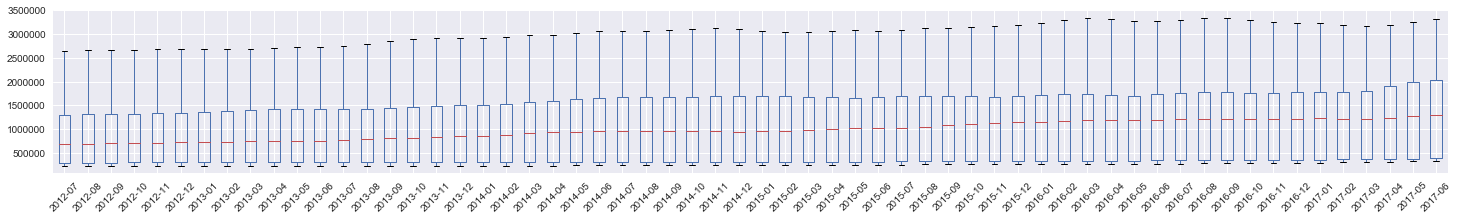

In [32]:
## show box plot from 2012-2017
plt.figure(figsize=(25,3))
fig1 = zillow_NYC.boxplot(column=zillow_continuous[-60:])
fig1 = fig1.set_xticklabels(fig1.get_xticklabels(),rotation=45)

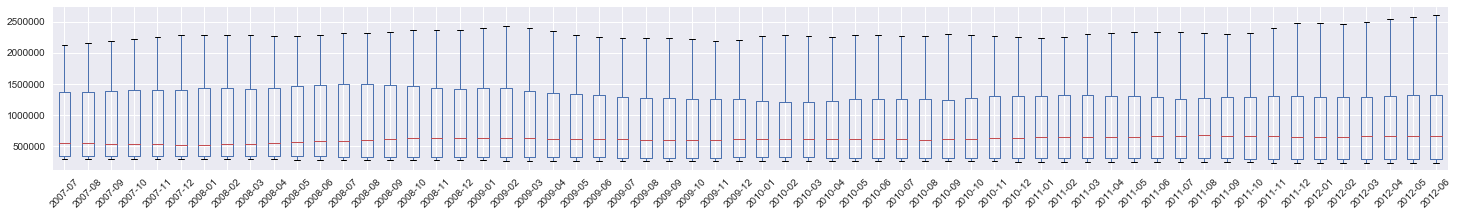

In [33]:
## show box plot from 2007-2012
plt.figure(figsize=(25,3))
fig2 = zillow_NYC.boxplot(column=zillow_continuous[-120:-60])
fig2 = fig2.set_xticklabels(fig2.get_xticklabels(),rotation=45)

There are no outliers for the most recent 10 years data

### 1.8 Select Columns

After considering the relevance, accuracy and completeness of our data, I will delete RegionId and select the most recent 10 years data (2007-07 ~ 2017-06) as the columns to use

In [34]:
## Select the most recent 10 years data (2007-07 ~ 2017-06)
zillow_clean = pd.concat([zillow_NYC.iloc[:,1:7],zillow_NYC.iloc[:,142:]], axis=1)

## Change 'RegionName' to 'Zipcode'
zillow_clean = zillow_clean.rename(index=str, columns={"RegionName": "zipcode"})

zillow_clean.head()

,zipcode,City,State,Metro,CountyName,SizeRank,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,10025,New York,NY,New York,New York,1,896100.0,923900.0,952900.0,964600.0,972500.0,973800.0,973400.0,966500.0,966800.0,967100.0,974800.0,976800.0,976100.0,973700.0,974500.0,973200.0,966400.0,950400.0,933300.0,920900.0,909400.0,891400.0,873300.0,858800.0,850200.0,842800.0,834000.0,828800.0,821400.0,813900.0,813300.0,821500.0,831700.0,845100.0,854500.0,858900.0,859200.0,863500.0,876000.0,886100.0,890000.0,894200.0,901800.0,909500.0,913300.0,907400.0,900000.0,897700.0,896300.0,892300.0,890400.0,888600.0,891700.0,899500.0,904400.0,908200.0,914000.0,915100.0,912300.0,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,10023,New York,NY,New York,New York,3,1407400.0,1419700.0,1457400.0,1500800.0,1524900.0,1537800.0,1558700.0,1586100.0,1602300.0,1621100.0,1639300.0,1657400.0,1657400.0,1656100.0,1649400.0,1643400.0,1632400.0,1618200.0,1588300.0,1543600.0,1500800.0,1464200.0,1426100.0,1387300.0,1362600.0,1351700.0,1344300.0,1331800.0,1334800.0,1314200.0,1271900.0,1252300.0,1262300.0,1279200.0,1309000.0,1335300.0,1353800.0,1366400.0,1372100.0,1381300.0,1385000.0,1388100.0,1399100.0,1399800.0,1389300.0,1384700.0,1380900.0,1367900.0,1365400.0,1375100.0,1380400.0,1377000.0,1375100.0,1379000.0,1395200.0,1414500.0,1419000.0,1403100.0,1383200.0,1376700.0,1378200.0,1378700.0,1375900.0,1366700.0,1365500.0,1382200.0,1404700.0,1428000.0,1445700.0,1452900.0,1460100.0,1484400.0,1508400.0,1522800,1538300,1568600,1597400,1622900,1654300,1684600,1713000,1728800,1736100,1745900,1753800,1736600,1730400,1734500,1728700,1720800,1717700,1700100,1680400,1676400,1685600,1708100,1730400,1751800,1778300,1810400,1831600,1844400,1861600,1889600.0,1901500.0,1895300.0,1890200.0,1898400,1924500,1967300,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
13,10128,New York,NY,New York,New York,14,1033500.0,1049700.0,1067900.0,1086700.0,1100500.0,1115100.0,1142000.0,1178800.0,1196200.0,1200200.0,1218700.0,1243300.0,1241000.0,1226400.0,1218200.0,1200800.0,1188000.0,1179600.0,1157300.0,1118700.0,1085800.0,1050800.0,1019200.0,993700.0,981400.0,971200.0,961700.0,957500.0,959300.0,969400.0,985400.0,983700.0,983400.0,1007600.0,1023000.0,1010500.0,1006800.0,1019400.0,1026900.0,1023800.0,1014900.0,992800.0,974500.0,965200.0,963200.0,959200.0,964400.0,975700.0,988600.0,998000.0,1019700.0,1045500.0,1064200.0,1066000.0,1057500.0,1058600.0,1069600.0,1068700.0,1054500.0,1045000.0,1043400.0,1050300.0,1050500.0,1050700.0,1059700.0,1079600.0,1091600.0,1106100.0,1121700.0,1139900.0,1153100.0,1174400.0,1182500.0

In [35]:
## Check again for dataframe shape
print(f'zillow_clean df shape: {zillow_clean.shape}')

zillow_clean df shape: (25, 126)


In [36]:
## Check again for unique values
print(zillow_clean.City.unique())
print(zillow_clean.State.unique())
print(zillow_clean.Metro.unique())
print(zillow_clean.CountyName.unique())

['New York']
['NY']
['New York']
['New York' 'Kings' 'Richmond' 'Queens']


In [37]:
## Delete Columns with Single Values
zillow_clean = zillow_clean.drop(['City','State','Metro'],axis=1)

In [38]:
## Check descriptive analysis
zillow_clean.describe()

,zipcode,SizeRank,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
count,25.000000,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,10412.680000,1044.880000,8.279480e+05,8.364000e+05,8.475080e+05,8.569440e+05,8.656320e+05,8.717280e+05,8.758200e+05,8.788640e+05,8.835640e+05,8.885440e+05,8.928960e+05,8.986800e+05,9.034320e+05,9.065960e+05,9.087360e+05,9.074480e+05,9.022440e+05,8.996720e+05,8.983960e+05,8.911560e+05,8.758880e+05,8.570960e+05,8.383920e+05,8.224720e+05,8.117040e+05,8.046800e+05,7.979800e+05,7.934520e+05,7.931680e+05,7.930000e+05,7.926240e+05,7.933160e+05,7.962600e+05,8.031360e+05,8.126720e+05,8.186840e+05,8.196920e+05,8.215880e+05,8.254920e+05,8.281040e+05,8.284840e+05,8.285880e+05,8.290600e+05,8.305720e+05,8.325880e+05,8.330360e+05,8.316040e+05,8.303560e+05,8.307920e+05,8.317080e+05,8.322720e+05,8.330120e+05,8.362080e+05,8.401480e+05,8.420840e+05,8.442880e+05,8.507280e+05,8.563120e+05,8.579640e+05,8.594040e+05,8.644560e+05,869892.000,8.736040e+05,8.763200e+05,8.788080e+05,8.832680e+05,8.901960e+05,8.974160e+05,9.026480e+05,9.092640e+05,9.182200e+05,9.285520e+05,9.407960e+05,9.536240e+05,9.674880e+05,9.826760e+05,9.954320e+05,1.003616e+06,1.013504e+06,1.023556e+06,1.032532e+06,1.041172e+06,1.048708e+06,1.055012e+06,1.058148e+06,1.056244e+06,1.055504e+06,1.060244e+06,1.064372e+06,1.064816e+06,1.063136e+06,1.062864e+06,1.064256e+06,1.068384e+06,1.075052e+06,1.084768e+06,1.096820e+06,1.109112e+06,1.119540e+06,1.128964e+06,1.136364e+06,1.143964e+06,1.154828e+06,1.165700e+06,1.169232e+06,1.165704e+06,1.163616e+06,1.172652e+06,1.187780e+

In [39]:
#zillow_clean.to_csv('zillow_clean.csv',index = False)

## 2. AirBnB Dataset

### 2.1 Read and Inspect Data

In [40]:
## Read Airbnb data
airbnb = pd.read_csv("listings.csv")

In [41]:
## Show Head Records
airbnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,2.020000e+13,5/3/2017,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle français et anglais, (lire Français c...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,We are walkable to Pelham Park which is the la...,"On the island, you can walk to everything. A ...",Feel free to enjoy our large backyard in seaso...,We speak fluent French and English. We will b...,No extra guests or visitors who are not in the...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,119445,https://www.airbnb.com/users/show/119445,Linda & Didier,5/6/2010,"New York, New York, United States","I am a designer, former instructor at a design...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/2de30fe4-b...,https://a0.muscache.com/im/pictures/2de30fe4-b...,City Island,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"City Island, Bronx, NY 10464, United States",City Island,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.852054,-73.788680,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air condition...",NaN,$99.00,NaN,NaN,$100.00,NaN,1,$20.00,1,7,yesterday,NaN,24,54,80,170,5/3/2017,25,1/18/2016,4/23/2017,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,2.020000e+13,5/4/2017,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You’ll love my...,(URL HIDDEN),My place is close to Sea Shore. You’ll love my...,none,(URL HIDDEN),"Fine sea food restaurant, bars and night clubs...",NaN,"public transport from Grand Central, NYC or fr...",NaN,NaN,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,9117975,https://www.airbnb.com/users/show/9117975,Collins,9/29/2013,"New York, New York, United States",I am married with 3 children and 2 grandkid. ...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/9117975/profi...,https://a0.muscache.com/im/users/9117975/profi...,City Island,1.0,1.0,"['phone', 'facebook']",t,f,"City Island, Bronx, NY 10464, United States",City Island,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.853491,-73.788607,t,Apart

In [42]:
## Show Tail Records
airbnb.tail(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
40750,18324921,https://www.airbnb.com/rooms/18324921,2.020000e+13,5/4/2017,Yacht phish shows Madison sq garden,I will be chartering my yacht for the phish sh...,52' Bowman sloop made in 1986. A very heavy se...,I will be chartering my yacht for the phish sh...,none,Blocks from the show,Please ask as many questions as you like,Yes,Full access,As much interaction as you like,Good times,https://a0.muscache.com/im/pictures/e1521447-8...,https://a0.muscache.com/im/pictures/e1521447-8...,https://a0.muscache.com/im/pictures/e1521447-8...,https://a0.muscache.com/im/pictures/e1521447-8...,86490267,https://www.airbnb.com/users/show/86490267,Pete,7/28/2016,U.S. Virgin Islands,Please see more reviews at my other listings a...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/84b74741-8...,https://a0.muscache.com/im/pictures/84b74741-8...,NaN,7.0,7.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"New York, NY 10004, United States",NaN,SoHo,Manhattan,New York,NY,10004,New York,"New York, NY",US,United States,40.726605,-74.012903,f,Boat,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Air conditioning"",Kitchen,""Smoking allowe...",NaN,$600.00,NaN,NaN,NaN,NaN,2,$200.00,1,1125,4 days ago,NaN,0,4,34,309,5/4/2017,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,flexible,f,f,2,NaN
40751,18035489,https://www.airbnb.com/rooms/18035489,2.020000e+13,5/5/2017,In the heart of tourist attractions,Perfect loft,NaN,Perfect loft,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/967c4da5-5...,https://a0.muscache.com/im/pictures/967c4da5-5...,https://a0.muscache.com/im/pictures/967c4da5-5...,https://a0.muscache.com/im/pictures/967c4da5-5...,114388692,https://www.airbnb.com/users/show/114388692,Valerie,2/1/2017,US,NaN,within a day,50%,NaN,f,https://a0.muscache.com/im/pictures/0b7372cf-8...,https://a0.muscache.com/im/pictures/0b7372cf-8...,Manhattan,1.0,1.0,"['email', 'phone']",t,f,"Manhattan, New York, NY 10029, United States",Manhattan,East Harlem,Manhattan,New York,NY,10029,New York,"New York, NY",US,United States,40.793392,-73.951867,t,Apartment,Private room,4,1.0,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",NaN,$129.00,NaN,NaN,NaN,NaN,1,$0.00,14,29,3 weeks ago,NaN,29,59,89,179,5/5/2017,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,strict,f,f,1,NaN
40752,17360085,https://www.airbnb.com/rooms/17360085,2.020000e+13,5/3/2017,Phish bakers dozen,I will be renting two staterooms on my yacht f...,NaN,I will be renting two staterooms on my yacht f...,none,NaN,NaN,NaN,NaN,Guests have full access and I offer as much

In [43]:
## Check Data Shape
print(airbnb.shape)
print(f'airbnb dataset has {airbnb.shape[0]} observations and {airbnb.shape[1]} columns.')

(40753, 95)
airbnb dataset has 40753 observations and 95 columns.


I noticed that some columns are not relevant for our objectives, such as host information, scrapping id and url. What we care are basically the zipcode, the location of the property, features of the property to rent(such as room type and bedrooms), latest date on rent(last scrapping date) and rent price.

So in order to make the data quality check process more convenient, I will firstly select all the relevant columns.

### 2.2 Select Relevant Columns

In [44]:
## indentifier columns
airbnb_id_col = ['id']

## zipcode columns
airbnb_zipcode_col = ['zipcode']

## property location columns
airbnb_location_col = ['city','state','country','latitude','longitude']
## property features columns
airbnb_feature_col = ['room_type','bedrooms','square_feet']

## rent price columns
airbnb_price_col = ['price','weekly_price','monthly_price']

## latest rent date columns
airbnb_date_col = ['last_scraped']

In [45]:
## combime relevant columns and show head records
Relev_cols = airbnb_id_col + airbnb_zipcode_col + airbnb_location_col + airbnb_feature_col + airbnb_price_col + airbnb_date_col
airbnb_sel = airbnb[Relev_cols]
airbnb_sel.head(3)

,id,zipcode,city,state,country,latitude,longitude,room_type,bedrooms,square_feet,price,weekly_price,monthly_price,last_scraped
0,7949480,10464,Bronx,NY,United States,40.852054,-73.788680,Private room,1.0,NaN,$99.00,NaN,NaN,5/3/2017
1,16042478,10464,Bronx,NY,United States,40.853491,-73.788607,Private room,1.0,NaN,$200.00,NaN,NaN,5/4/2017
2,1886820,10464,Bronx,NY,United States,40.841144,-73.783052,Entire home/apt,3.0,NaN,$300.00,NaN,NaN,5/4/2017


In [46]:
print(airbnb_sel.shape)
print(f'The airbnb dataset with selected columns has {airbnb_sel.shape[0]} observations and {airbnb_sel.shape[1]} columns.')

(40753, 14)
The airbnb dataset with selected columns has 40753 observations and 14 columns.


### 2.3 Check Data Types 

#### 2.3.1 Check Data Types

In [47]:
## Check data type of each variable
pd.DataFrame(airbnb_sel.dtypes).transpose()

,id,zipcode,city,state,country,latitude,longitude,room_type,bedrooms,square_feet,price,weekly_price,monthly_price,last_scraped
0,int64,object,object,object,object,float64,float64,object,float64,float64,object,object,object,object


Noticed that zipcode and all the price-related columns have wrong data type. They should be numeric. I will fix the type in 2.4

#### 2.3.2 Categorize Variables

In [48]:
## Get Numerical Variables
airbnb_numerical = [var for var in airbnb_sel.columns if airbnb_sel[var].dtype!='O']
airbnb_numerical = airbnb_numerical + airbnb_zipcode_col + airbnb_price_col
print(f'Numerical Variables: {len(airbnb_numerical)}')

## Get Categorical Variables
airbnb_categorical = [var for var in airbnb_sel.columns if var not in airbnb_numerical]
print(f'Categorical Variables: {len(airbnb_categorical)}')

## Get Discrete Variables
airbnb_discrete = ['id','zipcode','bedrooms']
print(f'Discrete Variables: {len(airbnb_discrete)}')

## Get Continuous Variables
airbnb_continuous = [var for var in airbnb_numerical if var not in airbnb_discrete]
print(f'Continuous Variables: {len(airbnb_continuous)}')

Numerical Variables: 9
Categorical Variables: 5
Discrete Variables: 3
Continuous Variables: 6


### 2.4 Fix Data Types

#### 2.4.1 Fix Zipcode

In [49]:
## Show unique values of 'zipcode'
airbnb_sel['zipcode'].unique()

array(['10464', '10467', '10469', '10462', '11105', '11102', '11370',
       '11106', nan, '11103', '11229', '10472', '10473', '11417', '11416',
       '11421', '11419', '11418', '10457', '10458', '10468', '10460',
       '11357', '10312', '10305', '11692', '11101', '11377', '10003',
       '11103-3233', '11356', '11214', '11228', '11360', '11361', '11364',
       '10280', '10006', '10282', '10004', '10012', '10005', '10033',
       '11209', '11220', '10306', '11691', '11233', '11206', '11221',
       '11205', '11216', '11238', '11211', '11213', '11237', '11226',
       '11207', '10013', '11694', '11001', '11426', '11427', '11426-1175',
       '11204', '11219', '11223', '11236', '11234', '11217', '11201',
       '11232', '11218', '11210', '11435', '11432', '11235', '11224',
       '11225', '11203', '11231', '10451', '10455', '10454', '11212',
       '11249', '11385', '10026', '11411', '11413', '11429', '11412',
       '10002', '10038', '10065', '11374', '11215', '10301', '10314',
     

In [50]:
## missing ratio
print(f'zipcode missing ratio: {airbnb_sel["zipcode"].isnull().sum()/len(airbnb_sel["zipcode"])}')

## records containing '1m'
print(f'zipcode containing 1m: {len(airbnb_sel[airbnb_sel.zipcode == "1m"])}')

zipcode missing ratio: 0.014992761269109022
zipcode containing 1m: 1


There are NA, "-", "\n" and '1m' in the values. For NA and 1m, the missing ratio is not large, and there is no way to impute a zipcode so we can delete them. For "-" and "\n", we only need to extract the string before the character. Some values are in float format, we need to transform them into 'int'.

In [51]:
## Delete missing values in zipcode
nullLabel = airbnb_sel['zipcode'].isnull()
airbnb_zipfix = airbnb_sel[np.invert(nullLabel)]

## Delete '1m' values in zipcode
tmpIndex = np.where(airbnb_zipfix.zipcode=='1m')[0][0]
airbnb_zipfix = airbnb_zipfix.drop(airbnb_zipfix.index[[tmpIndex]])

## Engineer '-' and '\n' in zipcode
airbnb_zipfix['zipcode'] = airbnb_zipfix.zipcode.apply(lambda x:lib.extract_zip(x))

## Check number of rows and columns
print(f'airbnb df shape after fixing zipcode: {airbnb_zipfix.shape}')

airbnb df shape after fixing zipcode: (40141, 14)


#### 2.4.1 Fix Price

In [52]:
## Show head values of 'price'
airbnb_sel['price'].head()

0     $99.00 
1    $200.00 
2    $300.00 
3    $125.00 
4     $69.00 
Name: price, dtype: object

Notice that there are $ signs in the values, we need to delete it

In [53]:
## Fix price
airbnb_zipfix[['price']] = airbnb_zipfix[['price']].applymap(lib.fix_price)
airbnb_zipfix[['weekly_price']] = airbnb_zipfix[['weekly_price']].applymap(lib.fix_price)
airbnb_zipfix[['monthly_price']] = airbnb_zipfix[['monthly_price']].applymap(lib.fix_price)
airbnb_fixed = airbnb_zipfix

## Check number of rows and columns
print(f'airbnb df shape after fixing price: {airbnb_fixed.shape}')

airbnb df shape after fixing price: (40141, 14)


In [54]:
## Check again for data types
pd.DataFrame(airbnb_fixed.dtypes).transpose()

,id,zipcode,city,state,country,latitude,longitude,room_type,bedrooms,square_feet,price,weekly_price,monthly_price,last_scraped
0,int64,int64,object,object,object,float64,float64,object,float64,float64,float64,float64,float64,object


The data types are right!

### 2.5 Check duplicated rows and columns

In [55]:
## Check number of duplicated rows
airbnb_fixed.duplicated().sum()

0

In [56]:
## Check number of duplicated columns
airbnb_fixed_t = airbnb_fixed.transpose().head()
airbnb_fixed_t.duplicated().sum()

0

No duplicated rows and columns. The data is **unique**.

### 2.6 Check Data Values

#### 2.6.1 Check Values of Categorical and Discrete Variables

In [57]:
airbnb_discrete + airbnb_categorical

['id',
 'zipcode',
 'bedrooms',
 'city',
 'state',
 'country',
 'room_type',
 'last_scraped']

We do not need to check id

In [58]:
# Unique Values for each variable
print(f'Unique zipcode Values:{len(airbnb_fixed.zipcode.unique())}')
print(f'Unique bedrooms Values:{len(airbnb_fixed.bedrooms.unique())}')
print(f'Unique city Values:{len(airbnb_fixed.city.unique())}')
print(f'Unique state Values:{len(airbnb_fixed.state.unique())}')
print(f'Unique country Values:{len(airbnb_fixed.country.unique())}')
print(f'Unique room_type Values:{len(airbnb_fixed.room_type.unique())}')
print(f'Unique last_scraped Values:{len(airbnb_fixed.last_scraped.unique())}')

Unique zipcode Values:197
Unique bedrooms Values:12
Unique city Values:302
Unique state Values:6
Unique country Values:2
Unique room_type Values:3
Unique last_scraped Values:4


In [59]:
## Check Country Values
airbnb_fixed.country.unique()

array(['United States', 'Uruguay'], dtype=object)

##### Inconsistency of the country variable

In [60]:
## Check Records in Uruguay
airbnb_fixed[airbnb_fixed.country == 'Uruguay'].head()

,id,zipcode,city,state,country,latitude,longitude,room_type,bedrooms,square_feet,price,weekly_price,monthly_price,last_scraped
9138,6645634,10016,New York,New York,Uruguay,40.713053,-74.006888,Entire home/apt,1.0,NaN,237.0,NaN,NaN,5/4/2017


The country variable which showing the property in Uraguay appears to be a place in NYC, so this variable seems not accurate and unreliable.

In [61]:
## Check State Values
airbnb_fixed.state.unique()

array(['NY', 'MP', 'New York', 'ny', 'NJ', 'VT'], dtype=object)

The values are very messy, it has various format showing states in New York

In [62]:
## Check City Values
airbnb_fixed.city.unique()

array(['Bronx', 'City Island', 'Bronx ', 'Queens', 'New York', 'Astoria',
       'Long Island City', 'Astoria ', 'astoria', 'East Elmhurst',
       'East Elmhurst ', 'ASTORIA', 'Astoria, New York ',
       'astoria, queens', 'Astoria, New York', 'Queens ', 'astotia',
       'Astoria,New York ', 'Brooklyn', 'Brooklyn ', 'new york',
       'ozone park queens ', 'queens', 'Ozone Park', 'Ozone Park, Queens',
       'Kew Gardens', 'Whitestone ', 'Whitestone', 'Staten Island',
       'Staten Island ', 'Arverne', 'Arverne ', 'Averne', 'Far Rockaway ',
       'ARVERNE', 'Rockaway Beach', 'Rockaway Beach ', 'NY',
       'New York City', nan, 'Long Island City ', 'Long Island city',
       'Astoria, Queens ', 'ASTORIA/LIC', 'Astoria, Queens', 'New York ',
       'Astoria Queens', 'Astoria - New York', 'Astoria New York',
       'NEW YORK', 'LONG ISLAND CITY', 'Astoria,Queens', 'Astoria, N.Y.C.',
       'LIC', 'Bayside', 'Oakland Gardens', 'Bayside ', 'Bayside, Queens',
       'Bay Ridge ', 'broo

Since the values are too messy, I cannot be sure of the validity of the location information in this dataset. So it's better to use USPS NYC zipcode list to find out the real NYC zipcode.

In [63]:
## Check Zipcode Values
airbnb_fixed.zipcode.unique()

array([10464, 10467, 10469, 10462, 11105, 11102, 11370, 11106, 11103,
       11229, 10472, 10473, 11417, 11416, 11421, 11419, 11418, 10457,
       10458, 10468, 10460, 11357, 10312, 10305, 11692, 11101, 11377,
       10003, 11356, 11214, 11228, 11360, 11361, 11364, 10280, 10006,
       10282, 10004, 10012, 10005, 10033, 11209, 11220, 10306, 11691,
       11233, 11206, 11221, 11205, 11216, 11238, 11211, 11213, 11237,
       11226, 11207, 10013, 11694, 11001, 11426, 11427, 11204, 11219,
       11223, 11236, 11234, 11217, 11201, 11232, 11218, 11210, 11435,
       11432, 11235, 11224, 11225, 11203, 11231, 10451, 10455, 10454,
       11212, 11249, 11385, 10026, 11411, 11413, 11429, 11412, 10002,
       10038, 10065, 11374, 11215, 10301, 10314, 10011, 10001, 10010,
       10014, 10018, 10119, 10036, 10029, 10016, 10007, 10456, 10304,
       10475, 10452, 11368, 10465, 10453, 11208, 11362, 11363, 11369,
       11372, 10129, 10035, 10037, 10027, 10128, 10025, 10030, 10028,
       10019, 10459,

In [64]:
## Check Bedroooms Values
airbnb_fixed.bedrooms.unique()

array([  1.,   3.,   0.,   2.,   4.,   5.,   6.,   7.,  nan,   9.,   8.,
        10.])

For our analysis, we should choose the property with only 2 bedrooms

In [65]:
## Check Room Type Values
airbnb_fixed.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

We should choose the property which are rent in 'Entire home/apt' type. If the room is rent in a private or shared type, the rent price will be lower than the entire home, so it will not be representative for our analysis of a whole two-bedroom property.

In [66]:
## Check Scrapping Date
airbnb_fixed.last_scraped.unique()

array(['5/3/2017', '5/4/2017', '5/5/2017', '5/2/2017'], dtype=object)

They are all in May, 2017. So it is the latest date we know from the dataset that the properties are still on rent. Also the rent price shown in this dataset should correspond to the rent date in May, 2017

#### 2.6.2 Check Values of Continuous Variables

In [67]:
airbnb_fixed[airbnb_continuous].describe()

,latitude,longitude,square_feet,price,weekly_price,monthly_price
count,40141.000000,40141.000000,564.000000,40141.000000,8957.000000,7367.000000
mean,40.730823,-73.955949,715.526596,145.390947,872.994194,2865.233609
std,0.053732,0.041205,745.555581,210.702158,756.493416,2586.447055
min,40.499794,-74.240843,0.000000,10.000000,70.000000,300.000000
25%,40.692339,-73.983930,250.000000,70.000000,452.000000,1500.000000
50%,40.724180,-73.957200,650.000000,100.000000,699.000000,2200.000000
75%,40.764553,-73.940484,900.000000,170.000000,1000.000000,3500.000000
max,40.912164,-73.711750,10118.000000,10000.000000,14000.000000,60000.000000


The price looks reasonable for the latitude, longitude, square_feet, daily, weekly and monthly rent.

### 2.7 Select Observations with Special Condition

In [68]:
## Selecting zipcode in NYC
airbnb_NYC = airbnb_fixed[list(map(lambda x:lib.helperInNYC(x,zipList),airbnb_fixed.zipcode))]
print(f'unique zipcode: {len(airbnb_NYC.zipcode.unique())}')

unique zipcode: 183


In [69]:
## Selecting room_type = Entire home/apt & bedrooms = 2
airbnb_NYC = airbnb_NYC[(airbnb_NYC.bedrooms == 2) & (airbnb_NYC.room_type == 'Entire home/apt')]
print(f'shape after selection: {airbnb_NYC.shape}')

shape after selection: (4506, 14)


### 2.8 Check Missing Values

In [70]:
## Show number of missing values and missing ratios for each column
total = airbnb_NYC.isnull().sum()
ratios = airbnb_NYC.isnull().mean()
pd.concat([total, ratios], axis=1, keys=['Total', 'Ratios']).transpose()

,id,zipcode,city,state,country,latitude,longitude,room_type,bedrooms,square_feet,price,weekly_price,monthly_price,last_scraped
Total,0.0,0.0,5.00000,0.0,0.0,0.0,0.0,0.0,0.0,4399.000000,0.0,3524.000000,3697.000000,0.0
Ratios,0.0,0.0,0.00111,0.0,0.0,0.0,0.0,0.0,0.0,0.976254,0.0,0.782068,0.820462,0.0


square_feet, weekly_price and monthly_price have too many missing values, we should delete these columns. For other columns, city, states and country are not reliable and accurate, bedrooms are a single value right now and last_scraped is only useful to know the latest on rent date, which we have known it yet in the last step of 2.5.2. So the final variables we will keep right now are zipcode, price, latitude and longitude.

In [71]:
airbnb_NYC = airbnb_NYC[['zipcode','price','latitude','longitude']]

### 2.9 Check Outliers

In [72]:
## close all plots
plt.close('all')

In [73]:
## Daily Rent Price Distribution
config = {
    'x':airbnb_NYC.price,
    'title':'Daily Rent Price Distribution',
    'xaxis':'Price',
    'yaxis':'number'
}
lib.plot_hist(config)

The plot is very right skewed, most of the records are clustered between 0 and 1000. We can see some outliers here

Let's plot a box plot to see it more clearly

In [74]:
## plot box plot
config = {
    'y':airbnb_NYC.price,
    'title':'Daily Rent Price Box Plot',
    'xaxis':' ',
    'yaxis':'Price'
}
lib.plot_box(config)

The outliers are larger numbers, so I need to define an upper bound and count the outliers out of the upper bound.

In [75]:
## define upper bound:
upper = airbnb_NYC.price.quantile(0.5) + 3*airbnb_NYC.price.std()

In [76]:
## number and percentage of outliers:
print(f'number of outliers: {airbnb_NYC[airbnb_NYC.price>upper].shape[0]}')
print(f'percentage of outliers: {airbnb_NYC[airbnb_NYC.price>upper].shape[0]/np.float(airbnb_NYC.shape[0])}')

number of outliers: 28
percentage of outliers: 0.006213936972924989


The ratio of the outliers is very small, so I will just delete them

In [77]:
## clean outliers
airbnb_clean = airbnb_NYC[airbnb_NYC.price<=upper]
airbnb_clean.shape

(4478, 4)

In [78]:
## save as csv
#airbnb_clean.to_csv('airbnb_clean.csv',index = False)

### 2.10 Aggregate Data by zipcode

In [79]:
## Use mean value to aggregate zipcode
airbnb_agg = airbnb_clean.groupby(['zipcode']).mean().reset_index()
print(airbnb_agg.shape)
airbnb_agg.sort_values(by='price',ascending = False).head(10)

(143, 4)


,zipcode,price,latitude,longitude
44,10270,799.000000,40.706894,-74.008696
6,10007,495.000000,40.714915,-74.010516
41,10111,450.000000,40.759177,-73.983300
58,10460,425.000000,40.841659,-73.868176
14,10017,420.173913,40.752746,-73.971810
0,10001,414.301887,40.749609,-73.995414
39,10069,380.333333,40.778285,-73.989224
3,10004,370.222222,40.707830,-74.012969
73,11109,364.800000,40.744685,-73.957073
11,10013,360.886076,40.719407,-74.002547


In [80]:
## save as csv
#airbnb_agg.to_csv('airbnb_agg.csv',index = False)

## 3. Merge Zillow and AirBnB dataset

In [81]:
## Join two dataframes by zipcode
df = pd.merge(zillow_clean,airbnb_agg,how='inner',on='zipcode')
df.head()

,zipcode,CountyName,SizeRank,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,price,latitude,longitude
0,10025,New York,1,896100.0,923900.0,952900.0,964600.0,972500.0,973800.0,973400.0,966500.0,966800.0,967100.0,974800.0,976800.0,976100.0,973700.0,974500.0,973200.0,966400.0,950400.0,933300.0,920900.0,909400.0,891400.0,873300.0,858800.0,850200.0,842800.0,834000.0,828800.0,821400.0,813900.0,813300.0,821500.0,831700.0,845100.0,854500.0,858900.0,859200.0,863500.0,876000.0,886100.0,890000.0,894200.0,901800.0,909500.0,913300.0,907400.0,900000.0,897700.0,896300.0,892300.0,890400.0,888600.0,891700.0,899500.0,904400.0,908200.0,914000.0,915100.0,912300.0,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000,270.433962,40.798158,-73.966279
1,10023,New York,3,1407400.0,1419700.0,1457400.0,1500800.0,1524900.0,1537800.0,1558700.0,1586100.0,1602300.0,1621100.0,1639300.0,1657400.0,1657400.0,1656100.0,1649400.0,1643400.0,1632400.0,1618200.0,1588300.0,1543600.0,1500800.0,1464200.0,1426100.0,1387300.0,1362600.0,1351700.0,1344300.0,1331800.0,1334800.0,1314200.0,1271900.0,1252300.0,1262300.0,1279200.0,1309000.0,1335300.0,1353800.0,1366400.0,1372100.0,1381300.0,1385000.0,1388100.0,1399100.0,1399800.0,1389300.0,1384700.0,1380900.0,1367900.0,1365400.0,1375100.0,1380400.0,1377000.0,1375100.0,1379000.0,1395200.0,1414500.0,1419000.0,1403100.0,1383200.0,1376700.0,1378200.0,1378700.0,1375900.0,1366700.0,1365500.0,1382200.0,1404700.0,1428000.0,1445700.0,1452900.0,1460100.0,1484400.0,1508400.0,1522800,1538300,1568600,1597400,1622900,1654300,1684600,1713000,1728800,1736100,1745900,1753800,1736600,1730400,1734500,1728700,1720800,1717700,1700100,1680400,1676400,1685600,1708100,1730400,1751800,1778300,1810400,1831600,1844400,1861600,1889600.0,1901500.0,1895300.0,1890200.0,1898400,1924500,1967300,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300,296.620690,40.777508,-73.981488
2,10128,New York,14,1033500.0,1049700.0,1067900.0,1086700.0,1100500.0,1115100.0,1142000.0,1178800.0,1196200.0,1200200.0,1218700.0,1243300.0,1241000.0,1226400.0,1218200.0,1200800.0,1188000.0,1179600.0,1157300.0,1118700.0,1085800.0,1050800.0,1019200.0,993700.0,981400.0,971200.0,961700.0,957500.0,959300.0,969400.0,985400.0,983700.0,983400.0,1007600.0,1023000.0,1010500.0,1006800.0,1019400.0,1026900.0,1023800.0,1014900.0,992800.0,974500.0,965200.0,963200.0,959200.0,964400.0,975700.0,988600.0,998000.0,1019700.0,1045500.0,1064200.0,1066000.0,1057500.0,1058600.0,1069600.0,1068700.0,1054500.0,1045000.0,1043400.0,1050300.0,1050500.0,1050700.0,1059700.0,1079600.0,1091600.0,1106100.0,1121700.0,1139900.0,1153100.0,1174400.0,1

In [82]:
## df shape
print(df.shape)
print(f'df dataset has {df.shape[0]} observations and {df.shape[1]} columns.')

(22, 126)
df dataset has 22 observations and 126 columns.


In [83]:
## Show Head
df.head()

,zipcode,CountyName,SizeRank,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,price,latitude,longitude
0,10025,New York,1,896100.0,923900.0,952900.0,964600.0,972500.0,973800.0,973400.0,966500.0,966800.0,967100.0,974800.0,976800.0,976100.0,973700.0,974500.0,973200.0,966400.0,950400.0,933300.0,920900.0,909400.0,891400.0,873300.0,858800.0,850200.0,842800.0,834000.0,828800.0,821400.0,813900.0,813300.0,821500.0,831700.0,845100.0,854500.0,858900.0,859200.0,863500.0,876000.0,886100.0,890000.0,894200.0,901800.0,909500.0,913300.0,907400.0,900000.0,897700.0,896300.0,892300.0,890400.0,888600.0,891700.0,899500.0,904400.0,908200.0,914000.0,915100.0,912300.0,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000,270.433962,40.798158,-73.966279
1,10023,New York,3,1407400.0,1419700.0,1457400.0,1500800.0,1524900.0,1537800.0,1558700.0,1586100.0,1602300.0,1621100.0,1639300.0,1657400.0,1657400.0,1656100.0,1649400.0,1643400.0,1632400.0,1618200.0,1588300.0,1543600.0,1500800.0,1464200.0,1426100.0,1387300.0,1362600.0,1351700.0,1344300.0,1331800.0,1334800.0,1314200.0,1271900.0,1252300.0,1262300.0,1279200.0,1309000.0,1335300.0,1353800.0,1366400.0,1372100.0,1381300.0,1385000.0,1388100.0,1399100.0,1399800.0,1389300.0,1384700.0,1380900.0,1367900.0,1365400.0,1375100.0,1380400.0,1377000.0,1375100.0,1379000.0,1395200.0,1414500.0,1419000.0,1403100.0,1383200.0,1376700.0,1378200.0,1378700.0,1375900.0,1366700.0,1365500.0,1382200.0,1404700.0,1428000.0,1445700.0,1452900.0,1460100.0,1484400.0,1508400.0,1522800,1538300,1568600,1597400,1622900,1654300,1684600,1713000,1728800,1736100,1745900,1753800,1736600,1730400,1734500,1728700,1720800,1717700,1700100,1680400,1676400,1685600,1708100,1730400,1751800,1778300,1810400,1831600,1844400,1861600,1889600.0,1901500.0,1895300.0,1890200.0,1898400,1924500,1967300,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300,296.620690,40.777508,-73.981488
2,10128,New York,14,1033500.0,1049700.0,1067900.0,1086700.0,1100500.0,1115100.0,1142000.0,1178800.0,1196200.0,1200200.0,1218700.0,1243300.0,1241000.0,1226400.0,1218200.0,1200800.0,1188000.0,1179600.0,1157300.0,1118700.0,1085800.0,1050800.0,1019200.0,993700.0,981400.0,971200.0,961700.0,957500.0,959300.0,969400.0,985400.0,983700.0,983400.0,1007600.0,1023000.0,1010500.0,1006800.0,1019400.0,1026900.0,1023800.0,1014900.0,992800.0,974500.0,965200.0,963200.0,959200.0,964400.0,975700.0,988600.0,998000.0,1019700.0,1045500.0,1064200.0,1066000.0,1057500.0,1058600.0,1069600.0,1068700.0,1054500.0,1045000.0,1043400.0,1050300.0,1050500.0,1050700.0,1059700.0,1079600.0,1091600.0,1106100.0,1121700.0,1139900.0,1153100.0,1174400.0,1

## 4. Dataset Visualization

### 4.1 Visualization of Airbnb Dataset

In [84]:
## Distribution of all the daily rent price in NYC
config = {
    'x':airbnb_clean.price,
    'title':'Daily Rent Price Distribution',
    'xaxis':'Price',
    'yaxis':'number'
}
lib.plot_hist(config)

Most rent price are within roughly 80-300 range. For some properties, it could be as high as 1000 per day.

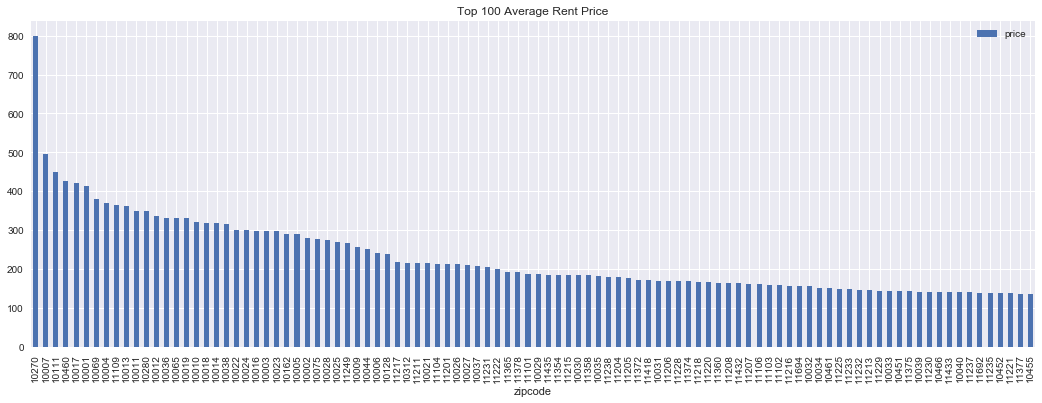

In [85]:
## Bar plot of average daily rent price(Top 100 zipcode in NYC)
airbnb_agg_sort = airbnb_agg.sort_values(by='price',ascending = False).head(100)
airbnb_agg_sort = airbnb_agg_sort[['zipcode','price']].set_index('zipcode')
bar_plot = airbnb_agg_sort.plot.bar(figsize=(18,6)).set_title('Top 100 Average Rent Price')

The rent price of the top 100 zipcode are all above $100 per day. The highest rent lies in zipcode 10270, the place of the Wall Street, which makes sense why the rent is so high. 

### 4.2 Visualization of Zillow Dataset

In [86]:
## Ten Year's Trend (zillow_clean)
config = {
    'x':zillow_clean.columns[3:],
    'y':zillow_clean.iloc[:,3:].values,
    'legends':zillow_clean.zipcode.values,
    'title':'Ten Year Trend of Property Price'
}
lib.plot_lines(config)

The property price is increasing over the years and for some zipcodes with relatively low property price, the increase seems slower.

### 4.3 Visualization of Merging Dataset

In [87]:
## Monthly Rent and Property Price in 2017-05
config = {
    'x':df['2017-05'],
    'y':df.price,
    'title':'2017-05 Monthly Rent and Property Price Scatter Plot',
    'xaxis':'Property Price',
    'yaxis':'Rent Price'
}
lib.plot_scatter(config)

We can see the property price and monthly rent have a positive relationship. Typically, higher property price will have higher rent price.

# Part 2 Modeling

I use Rent-to-Price rate as the metric to measure how profitable the area is. The higher the ratio, the more profitable the area is.

## 1. Rent-to-Price Ratio

In [88]:
## Calaulate Monthly Rent
df['Monthly_Rent'] = df['price']*30

## generate new dataframe with needed columns
var = '2017-05'
ratio_df = pd.concat([df.iloc[:,0:3],df[[var]],df.iloc[:,-4:]],axis=1)
ratio_df.head()

,zipcode,CountyName,SizeRank,2017-05,price,latitude,longitude,Monthly_Rent
0,10025,New York,1,1390000,270.433962,40.798158,-73.966279,8113.018868
1,10023,New York,3,2095000,296.620690,40.777508,-73.981488,8898.620690
2,10128,New York,14,1720500,238.836735,40.782023,-73.949627,7165.102041
3,10011,New York,15,2419700,348.051020,40.741182,-73.999412,10441.530612
4,10003,New York,21,2109100,296.698413,40.729843,-73.987968,8900.952381


In [89]:
## calculate ratio
lib.cal_ratio(ratio_df,'2017-05')
## sort in ascending order
ratio_df.sort_values(by='2017-05ratio', ascending = False)

,zipcode,CountyName,SizeRank,2017-05,price,latitude,longitude,Monthly_Rent,2017-05ratio
14,10312,Richmond,764,351700,215.000000,40.546331,-74.183701,6450.000000,0.013755
19,10304,Richmond,1958,321300,97.000000,40.626721,-74.076721,2910.000000,0.006793
12,11434,Queens,622,380200,112.500000,40.674082,-73.780854,3375.000000,0.006658
20,10305,Richmond,2087,418900,121.625000,40.596175,-74.076553,3648.750000,0.006533
13,10306,Richmond,668,347800,93.000000,40.568879,-74.111565,2790.000000,0.006016
6,11234,Kings,52,477100,118.500000,40.623621,-73.924942,3555.000000,0.005588
0,10025,New York,1,1390000,270.433962,40.798158,-73.966279,8113.018868,0.004378
11,10036,New York,580,1717100,331.960784,40.760134,-73.991612,9958.823529,0.004350
7,11215,Kings,71,1066200,184.617647,40.666849,-73.985283,5538.529412,0.003896
16,11217,Kings,1555,1276400,218.024096,40.682903,-73.978877,6540.722892,0.003843


In [90]:
## save as csv
ratio_df.to_csv('ratio_df.csv',index = False)

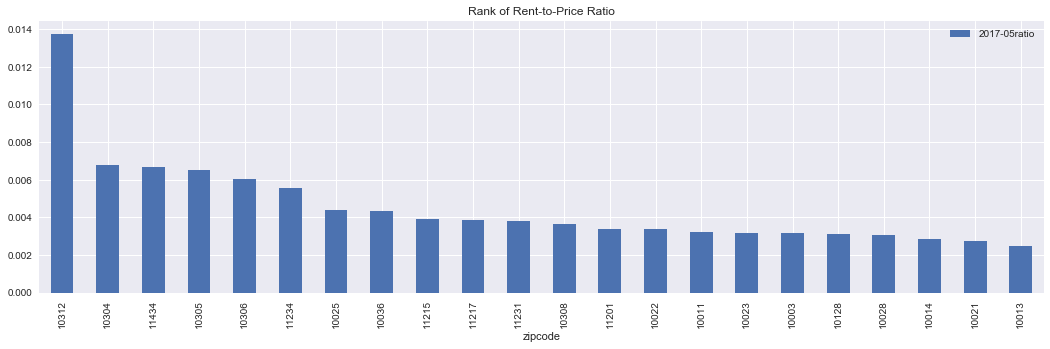

In [91]:
## Bar plot of price to rent ratio for each zipcode
ratio_df_sort = ratio_df.sort_values(by='2017-05ratio', ascending = False)
ratio_df_sort = ratio_df_sort[['zipcode','2017-05ratio']].set_index('zipcode')
bar_plot = ratio_df_sort.plot.bar(figsize=(18,5)).set_title('Rank of Rent-to-Price Ratio')

The top five zipcodes with highest Rent-to-Price rate are 10312, 10304, 11434, 10305, 10306. The five zipcodes will bid the most profitable area for our client to invest in. Now will analyze these five zipcode in property price aspect and rent price aspect.

## 2. Property Price Analysis 

In [92]:
## Selecting zillow data only within these five zipcode
five_zip = [10312, 10304, 11434, 10305, 10306]
zillow_clean_five = zillow_clean[(zillow_clean.zipcode.isin(five_zip))]

### 2.1 One Year Trend

In [93]:
config = {
    'x':zillow_clean_five.columns[-13:-1],
    'y':zillow_clean_five.iloc[:,-13:-1].values,
    'legends':zillow_clean_five.zipcode.values,
    'title':'One Year Trend of Property Price'
}
lib.plot_lines(config)

### 2.2 Five Year Trend

In [94]:
config = {
    'x':zillow_clean_five.columns[-61:-1],
    'y':zillow_clean_five.iloc[:,-61:-1].values,
    'legends':zillow_clean_five.zipcode.values,
    'title':'Five Year Trend of Property Price'
}
lib.plot_lines(config)

### 2.3 Ten Years Trend

In [95]:
config = {
    'x':zillow_clean_five.columns[3:],
    'y':zillow_clean_five.iloc[:,3:].values,
    'legends':zillow_clean_five.zipcode.values,
    'title':'Ten Year Trend of Property Price'
}
lib.plot_lines(config)

From the one year and five years trend, we can see all the property price within the five zipcode areas are increasing. For ten years trend, they decrease from 2008 because of the financial crisis. Considering the long term trend, we can see the 10312 property price is increasing more slowly that the other four zipcodes and in the final year the price is in the middle value compared with the other four zipcode areas, which means the investment cost in 10312 is not high and it is increasing slowly. So that's an important reason why it has high profitability, and it also worth investment in the long term.

## 3. Rent Price Analysis

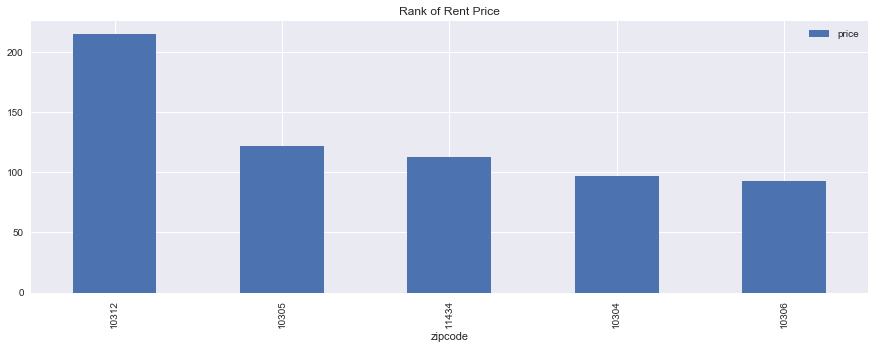

In [96]:
## Selecting airbnb aggregated data only within these five zipcode
five_zip = [10312, 10304, 11434, 10305, 10306]
airbnb_agg_five = airbnb_agg[(airbnb_agg.zipcode.isin(five_zip))].sort_values(by='price', ascending = False)[['zipcode','price']].set_index('zipcode')
bar_plot = airbnb_agg_five.plot.bar(figsize=(15,5)).set_title('Rank of Rent Price')

10312 has the highest rent price, much higher than the other four competitive zipcode areas. So that's another important reason why it has such a high profitability.

A more detailed analysis combined with tableau graphs will be shown in the analysis report. Please stay tuned!